In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [2]:
#Encode Categorical Data
le = LabelEncoder()
df['Heart Disease_encoded'] = le.fit_transform(df['Heart Disease'])
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Heart Disease_encoded
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence,0


In [ ]:
#LabelEncode converts text into numbers for ML models to understand

In [4]:
x = df[['Age', 'Heart Disease_encoded']]
y = df['ST depression']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 42
)

In [7]:
print(x_train.shape)

(216, 2)


In [8]:
print(x_test.shape)

(54, 2)


In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(x_test)
y_pred

array([1.6856013 , 1.48810721, 0.65638153, 0.58456549, 0.69228954,
       1.66764729, 0.31525537, 0.69228954, 0.65638153, 0.8179676 ,
       0.40502541, 0.67433554, 1.43424518, 1.7035553 , 0.80001359,
       0.51274946, 1.77537134, 1.59583126, 1.79332534, 0.67433554,
       1.82923336, 0.44093343, 1.54196923, 0.44093343, 0.42297942,
       1.79332534, 0.42297942, 2.04468146, 0.45888744, 0.62047351,
       0.62047351, 0.44093343, 1.63173927, 0.27934736, 1.45219919,
       1.66764729, 1.54196923, 1.7035553 , 1.66764729, 0.83592161,
       0.51274946, 0.62047351, 0.56661149, 0.3691174 , 0.35116339,
       0.78205958, 0.71024355, 1.81127935, 1.63173927, 0.40502541,
       0.92569165, 0.62047351, 0.45888744, 1.63173927])

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(mse)
#Lower error values maen better model performance

1.0723110023555729


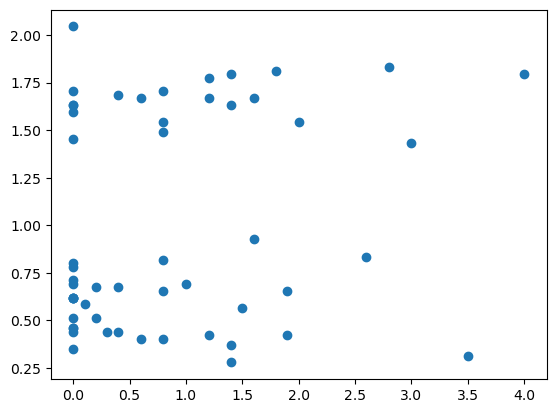

In [14]:
plt.scatter(y_test, y_pred)